<a href="https://colab.research.google.com/github/EdCsDsIA/TRAB_PRACTICO_MLEARNING/blob/main/Copia_de_Trabajo_final_OCTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TECNICATURA EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL

Profesor: Ing. Narciso Pérez

PROYECTO GRUPAL INCIDENTES VIALES

Grupo formado por:

--> Arévalo, Iván;

--> Giovine, Carina;

--> Gómez, Octavio;

--> Herrero Rivero, Eduardo.

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.io as pio
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/victimas_inciF_medellin.csv", sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(235843, 19)

In [4]:
#Primeros elementos del dataframe
df.head()

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,AÃ±o,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,MiÃ©,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,PeatÃ³n,Ene,MiÃ©,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,PeatÃ³n,Ene,MiÃ©,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes


In [5]:
#últimos 5 datos del dataset
df.tail(5)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,AÃ±o,Radicado,Latitud,Longitud,Comuna,Barrio
235838,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,Sep,Jue,30,22,30 - 39,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235839,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,F,29,AcompaÃ±ante de motocicleta,Sep,Jue,30,22,20 - 29,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235840,Heridos,30/9/2021,22:00:00,Caida Ocupante,CL 81 CR 39,M,41,AcompaÃ±ante de motocicleta,Sep,Jue,30,22,40 - 49,2021,1763968,"-75,54867484","6,272697",03 - Manrique,Santa InÃ©s
235841,Heridos,30/9/2021,23:00:00,Atropello,CR 63 CL 32,F,51,PeatÃ³n,Sep,Jue,30,23,50 - 59,2021,1764133,Sin Inf,Sin Inf,Sin Inf,NaN
235842,Heridos,30/9/2021,23:00:00,Otro,CR 107 CL 65,M,23,Motociclista,Sep,Jue,30,23,20 - 29,2021,1763946,Sin Inf,Sin Inf,Sin Inf,NaN


In [6]:
df.dtypes

Gravedad_victima       object
Fecha_incidente        object
Hora_incidente         object
Clase_incidente        object
Direccion_incidente    object
Sexo                   object
Edad                   object
Condicion              object
Mes                    object
Dia                    object
Num_dia                 int64
Hora                   object
Grupo_edad             object
AÃ±o                    int64
Radicado               object
Latitud                object
Longitud               object
Comuna                 object
Barrio                 object
dtype: object

In [7]:
# Informacion general de los datos de cada cloumna
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
df.info
df.rename(columns={'AÃ±o ': 'Anio'})

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,AÃ±o,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,MiÃ©,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,PeatÃ³n,Ene,MiÃ©,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,PeatÃ³n,Ene,MiÃ©,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235838,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,Sep,Jue,30,22,30 - 39,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235839,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,F,29,AcompaÃ±ante de motocicleta,Sep,Jue,30,22,20 - 29,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235840,Heridos,30/9/2021,22:00:00,Caida Ocupante,CL 81 CR 39,M,41,AcompaÃ±ante de motocicleta,Sep,Jue,30,22,40 - 49,2021,1763968,"-75,54867484","6,272697",03 - Manrique,Santa InÃ©s
235841,Heridos,30/9/2021,23:00:00,Atropello,CR 63 CL 32,F,51,PeatÃ³n,Sep,Jue,30,23,50 - 59,2021,1764133,Sin Inf,Sin Inf,Sin Inf,NaN


In [8]:
df = df.rename(columns={'AÃ±o': 'Anio'}) 

In [9]:
#con count() conozco cuantos registros tengo por columna
df.count()

Gravedad_victima       235843
Fecha_incidente        235843
Hora_incidente         235843
Clase_incidente        235843
Direccion_incidente    235831
Sexo                   235843
Edad                   235335
Condicion              235843
Mes                    235843
Dia                    235843
Num_dia                235843
Hora                   235843
Grupo_edad             235843
Anio                   235843
Radicado               235838
Latitud                235843
Longitud               235843
Comuna                 235843
Barrio                 235225
dtype: int64

In [10]:
# Realizamos una exploracion de nuestro data frame verificando por cada variable 
# sus valores unicos
print('\n Gravedad_victima = {}'.format(df.Gravedad_victima.unique()))
print('\n Fecha_incidente = {}'.format(df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(df.Hora_incidente.unique()))
print('\n Clase_incidente = {}'.format(df.Clase_incidente.unique()))
print('\n Direccion_incidente = {}'.format(df.Direccion_incidente.unique()))
print('\n Sexo = {}'.format(df.Sexo.unique()))
print('\n Edad = {}'.format(df.Edad.unique()))
print('\n Condicion = {}'.format(df.Condicion.unique()))
print('\n Mes = {}'.format(df.Mes.unique()))
print('\n Dia = {}'.format(df.Dia.unique()))
print('\n Num_dia = {}'.format(df.Num_dia.unique()))
print('\n Hora = {}'.format(df.Hora.unique()))
print('\n Grupo_edad = {}'.format(df.Grupo_edad.unique()))
print('\n Anio = {}'.format(df.Anio.unique()))
print('\n Radicado = {}'.format(df.Radicado.unique()))
print('\n Latitud = {}'.format(df.Latitud.unique()))
print('\n Longitud = {}'.format(df.Longitud.unique()))
print('\n Comuna = {}'.format(df.Comuna.unique()))
print('\n Barrio = {}'.format(df.Barrio.unique()[:10]))
df.columns.head()


 Gravedad_victima = ['Heridos' 'Muertos']

 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Clase_incidente = ['Otro' 'Atropello' 'Choque' 'Caida Ocupante' 'Volcamiento' 'Incendio']

 Direccion_incidente = ['CR 49 CL 72' 'CR 46 CL 98' 'CL 32 CR 84' ... 'CR 49 DG 50'
 'DG 75 B CL 76' 'CL 28 A CR 65 A']

 Sexo = ['M' 'F' 'Sin Inf' 'Sin inf']

 Edad = ['17' '20' '18' '19' '39' '44' '7' '35' '51' '30' 'Sin Inf' '34' '26' '29'
 '27' '32' '33' '24' '23' '36' '25' '28' '52' '38' '61' '58' '22' '73'
 '21' '5' '31' '4' '14' '63' '50' '49' '59' '54' '85' '6' '46' '62' '15'
 '41' '16' '2' '47' '37' '83' '55' '13' '65' '3' '72' '57' '9' '45' '12'
 '82' '43' '1' '40' '53' '56' '0' '8' '76' '71' '42' '11' '64' '67' '70'
 '66' '77' '48' '78' '68' '74' '10' '60' '79' '75' '69' '91' '81' '88'
 '89' '86' '90' '84' '80' '87' '92' '98' '95' '94' '97' '93' '96' '118'
 '

AttributeError: ignored

In [ ]:
# Numero de datos faltantes por columna
df.isnull().sum()

Gravedad_victima         0
Fecha_incidente          0
Hora_incidente           0
Clase_incidente          0
Direccion_incidente     12
Sexo                     0
Edad                   508
Condicion                0
Mes                      0
Dia                      0
Num_dia                  0
Hora                     0
Grupo_edad               0
Anio                     0
Radicado                 5
Latitud                  0
Longitud                 0
Comuna                   0
Barrio                 618
dtype: int64

In [12]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
  
duplicate

Duplicate Rows :


,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Anio,Radicado,Latitud,Longitud,Comuna,Barrio
16722,Heridos,14/7/2014,11:10:00,Choque,CR 63 CL 57,M,Sin Inf,Conductor,Jul,Lun,14,11,Sin Inf,2014,1448924,"6,173157779","-75,64456948",80 - Corregimiento de San Antonio de Prado,Cabecera San Antonio de Prado
19076,Heridos,9/8/2014,07:45:00,Choque,CL 77 CR 56 A,F,33,Conductor,Ago,SÃ¡b,9,7,30 - 39,2014,1452440,"6,275150551","-75,56812553",04 - Aranjuez,Moravia
30970,Heridos,25/12/2014,22:00:00,Choque,CL 48 D CR 48 A,M,22,Motociclista,Dic,Jue,25,22,20 - 29,2014,1469911,"6,247394491","-75,56735166",10 - La Candelaria,La Candelaria
37820,Heridos,15/3/2015,02:30:00,Choque,CL 18 CR 93,M,20,Motociclista,Mar,Dom,15,2,20 - 29,2015,1479668,"6,222449537","-75,61666884",70 - Corregimiento de Altavista,Altavista Sector Central
42997,Heridos,12/5/2015,14:00:00,Atropello,CL 53 CR 54 A,M,45,PeatÃ³n,May,Mar,12,14,40 - 49,2015,1487250,"6,253487028","-75,57026176",10 - La Candelaria,EstaciÃ³n Villa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233994,Heridos,11/9/2021,09:28:00,Choque,CL 60 CR 144,M,121,Pasajero,Sep,SÃ¡b,11,9,Sin Inf,2021,1761302,Sin Inf,Sin Inf,Sin Inf,NaN
234804,Heridos,19/9/2021,20:00:00,Atropello,CL 18 CR 103,F,10,PeatÃ³n,Sep,Dom,19,20,oct-19,2021,1762776,"-75,62500521","6,22331759",70 - Corregimiento de Altavista,Suburbano Altavista
235016,Heridos,21/9/2021,22:35:00,Choque,CR 36 A CL 51,F,53,Pasajero,Sep,Mar,21,22,50 - 59,2021,1762632,"-75,55757587","6,24433108",09 - Buenos Aires,Barrio Caicedo
235038,Heridos,22/9/2021,06:40:00,Choque,DG 80 CL 78,F,25,Pasajero,Sep,MiÃ©,22,6,20 - 29,2021,1762890,"-75,58625787","6,2814932",07 - Robledo,Bosques de San Pablo


In [13]:
# valores unicos de la columna Gravedad_victima
df['Gravedad_victima'].unique()


array(['Heridos', 'Muertos'], dtype=object)

In [14]:
# valores unicos de la columna Clase_incidente
df['Clase_incidente'].unique()

array(['Otro', 'Atropello', 'Choque', 'Caida Ocupante', 'Volcamiento',
       'Incendio'], dtype=object)

In [15]:
# valores unicos de la columna Direccion_incidente
df['Direccion_incidente'].unique()

array(['CR 49 CL 72', 'CR 46 CL 98', 'CL 32 CR 84', ..., 'CR 49 DG 50',
       'DG 75 B CL 76', 'CL 28 A CR 65 A'], dtype=object)

Podemos ver que existen muchas de las variables que no se corresponden al tipo de dato especificado:

Fecha_incidente Hora_incidente

Edad

Latitud

Longitud

In [16]:
# Convertir a tipo fecha  
print('\n Fecha_incidente = {}'.format(df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(df.Hora_incidente.unique()))
# En este caso tenemos que corregir el mes 'Sep' y pasar todos los registros a 'Sept'
print('\n Mes = {}'.format(df.Mes.unique()))
print('\n Dia = {}'.format(df.Dia.unique()))
# En este caso tenemos que corregir el ''oct-19' y pasar todos los registros a '10-19'
print('\n Grupo_edad = {}'.format(df.Grupo_edad.unique()))


 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Mes = ['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sept' 'Oct' 'Nov' 'Dic'
 'Sep']

 Dia = ['MiÃ©' 'Jue' 'Vie' 'SÃ¡b' 'Dom' 'Lun' 'Mar']

 Grupo_edad = ['oct-19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o mÃ¡s']


In [17]:
df.dtypes

Gravedad_victima       object
Fecha_incidente        object
Hora_incidente         object
Clase_incidente        object
Direccion_incidente    object
Sexo                   object
Edad                   object
Condicion              object
Mes                    object
Dia                    object
Num_dia                 int64
Hora                   object
Grupo_edad             object
Anio                    int64
Radicado               object
Latitud                object
Longitud               object
Comuna                 object
Barrio                 object
dtype: object



---


En las siguientes líneas de código, copiamos el dataset a otro para realizar los cambios en una copia y no ejecutar en el dataset original.

In [118]:
dfinal = df.copy()

In [119]:
dfinal.head()

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Anio,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,MiÃ©,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,PeatÃ³n,Ene,MiÃ©,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,MoscÃº No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,MiÃ©,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,PeatÃ³n,Ene,MiÃ©,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - BelÃ©n,Las Mercedes


In [120]:
#estandarizacion de valores 'Acompañante de motocicleta'],'Acompañante de Motocicleta'
dfinal['Condicion']= dfinal['Condicion'].replace(['PeatÃ³n'],'Peaton')

In [121]:
# valores unicos de la columna Condicion
dfinal['Condicion'].unique()

array(['Motociclista', 'Peaton', 'AcompaÃ±ante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero', 'AcompaÃ±ante de motocicleta'],
      dtype=object)

In [122]:
dfinal['Condicion']= dfinal['Condicion'].replace(['AcompaÃ±ante de Motocicleta'],'Acompaniante de Motocicleta')
dfinal['Condicion']= dfinal['Condicion'].replace(['AcompaÃ±ante de motocicleta'],'Acompaniante de Motocicleta')

In [123]:
# comparo los cambios de valores con el data set original
dfinal['Condicion'].unique()

array(['Motociclista', 'Peaton', 'Acompaniante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero'], dtype=object)

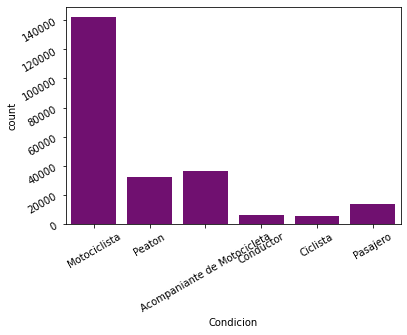

In [124]:
#figura en el dataset original
plt.figure()
sns.countplot(x=dfinal.Condicion, color='Purple')
plt.tick_params(labelrotation=30)

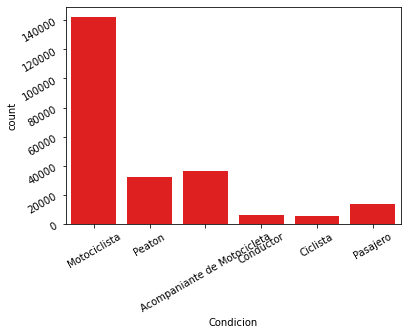

In [125]:
#figura en el dataset copia con la unificacion de los valores
plt.figure()
sns.countplot(x=dfinal.Condicion, color='red')
plt.tick_params(labelrotation=30)

In [126]:
dfinal['Sexo'].unique()

array(['M', 'F', 'Sin Inf', 'Sin inf'], dtype=object)

In [130]:
dfinal['Sexo']= dfinal['Sexo'].replace(['Sin Inf'],'N')

In [131]:
dfinal['Sexo'].unique()

array(['M', 'F', 'N'], dtype=object)

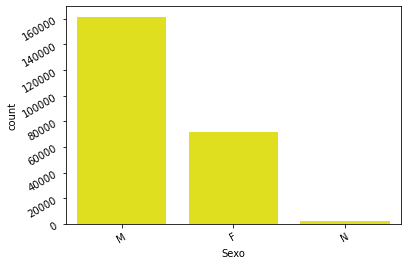

In [132]:
plt.figure()
sns.countplot(x=dfinal.Sexo, color='yellow')
plt.tick_params(labelrotation=30)

In [133]:
dfinal['Mes']= dfinal['Mes'].replace(['Sep'],'Sept')

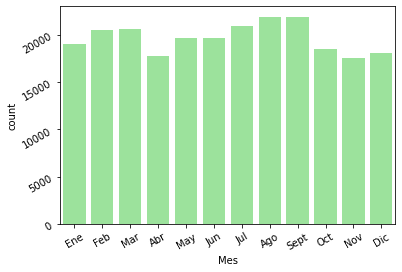

In [134]:
#gráfica que muestra como estaban los datos en el dataset original
plt.figure()
sns.countplot(x=dfinal.Mes, color='lightgreen')
plt.tick_params(labelrotation=30)

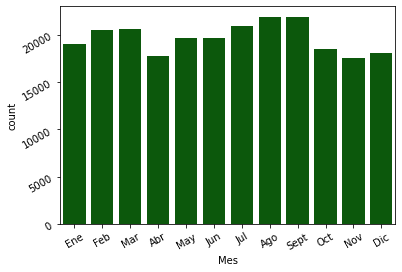

In [135]:
#gráfica que muestra como quedaron lso datos luego de unificar
plt.figure()
sns.countplot(x=dfinal.Mes, color='darkgreen')
plt.tick_params(labelrotation=30)

In [136]:
# Convertimos de object a datetime
dfinal['Fecha_incidente'] = pd.to_datetime(dfinal.Fecha_incidente, dayfirst=True, format='%d/%m/%Y')

In [137]:
#corregir el 'oct-19' y pasar todos los registros a '10-19'
dfinal.Grupo_edad = dfinal.Grupo_edad.replace(['oct-19'], '10 - 19')
print('Grupo_edad = {}'.format(dfinal.Grupo_edad.unique()))

Grupo_edad = ['10 - 19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o mÃ¡s']


In [138]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a nan
# para que los considere nulos.  Dejamos el 0 porque puede ser una edad antes del año 
# pero para no perder los registros que tienen un rango de edad los cambiamos a un 
# promedio entero. Convertir a numérico entero

# convierte STRING a NAN
dfinal.Edad = dfinal.Edad.replace(['Sin Inf'], np.nan)
# convierte de STRING a 0
# dfinal.Edad = dfinal.Edad.replace(['Sin Inf'], np.nan)

dfinal.Edad = dfinal.Edad.replace(['30-35'], '33')
dfinal.Edad = dfinal.Edad.replace(['45-50'], '44')
dfinal.Edad = dfinal.Edad.replace(['30 - 35'], '33')
dfinal.Edad = dfinal.Edad.replace(['20 - 29'], '25')

# errors='coerce' tranforma todos los errores en NaN y evito generar las correcciones anteriores
dfinal.Edad = pd.to_numeric(dfinal.Edad, downcast='integer')

# Convierto de NAN a 0
dfinal.Edad = dfinal.Edad.replace(np.nan, 0)

# CONVIERTO A INT64 // IMPORTANTE ANTES DE CONVERTIR A INT DEBEN PASAR EL NAN A UN VALOR
dfinal['Edad'] = dfinal['Edad'].astype(int)


print('Edad = {}'.format(dfinal.Edad.unique()))

Edad = [ 17  20  18  19  39  44   7  35  51  30   0  34  26  29  27  32  33  24
  23  36  25  28  52  38  61  58  22  73  21   5  31   4  14  63  50  49
  59  54  85   6  46  62  15  41  16   2  47  37  83  55  13  65   3  72
  57   9  45  12  82  43   1  40  53  56   8  76  71  42  11  64  67  70
  66  77  48  78  68  74  10  60  79  75  69  91  81  88  89  86  90  84
  80  87  92  98  95  94  97  93  96 118 106 108 107 104 105 119 109 137
 102  99 110 120 100 121 111]


In [139]:
# dfinal.Edad = dfinal.Edad.replace(np.nan, 0)
# print('Edad = {}'.format(dfinal.Edad.unique()))
# dfinal['Edad'] = dfinal['Edad'].astype(int)
dfinal.dtypes

Gravedad_victima               object
Fecha_incidente        datetime64[ns]
Hora_incidente                 object
Clase_incidente                object
Direccion_incidente            object
Sexo                           object
Edad                            int64
Condicion                      object
Mes                            object
Dia                            object
Num_dia                         int64
Hora                           object
Grupo_edad                     object
Anio                            int64
Radicado                       object
Latitud                        object
Longitud                       object
Comuna                         object
Barrio                         object
dtype: object

In [140]:
# El dia no puede ser 0 por lo tanto lo ponemos como valor nulo para analizarlo con las funciones
# de pandas despues analizamos que hacemos
dfinal.Num_dia = dfinal.Num_dia.replace([0], np.nan)
print('Num_dia = {}'.format(dfinal.Num_dia.unique()))

Num_dia = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. nan]


In [141]:
print('Hora = {}'.format(dfinal.Hora.unique()))

Hora = [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '9' '10'
 '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '0' '5' '6'
 '7' '8' '23' '3' '1' '2' '4' 'Sin Inf']


In [142]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a nan
# para que los considere nulos, el 0 es un valor válido, equivale a 24hs. Convertir a numérico entero
# dfinal.Hora = dfinal.Hora.replace(['Sin Inf'], np.nan)
dfinal.Hora = dfinal.Hora.replace('nan', 0)

dfinal.Hora = pd.to_numeric(dfinal.Hora, downcast='integer')
# dfinal.Hora = dfinal['Hora'].astype(int)
print('\n Hora = {}'.format(dfinal.Hora.unique()))

# CONVIERTO A INT64
dfinal['Hora'] = dfinal['Hora'].astype(int)

ValueError: ignored

In [143]:
# Convertir a numérico entero y los errores los conviento en Nan directamente 
dfinal.Radicado = pd.to_numeric(dfinal.Radicado, downcast='integer', errors='coerce')

# dfinal.Radicado = dfinal['Radicado'].astype(int) // esta linea no corre por que da error ya que uno de lso valores es '5,00E+19'

print('\n Radicado = {}'.format(dfinal.Radicado.unique()))


 Radicado = [1423940. 1423921. 1423849. ... 1763968. 1764133. 1763946.]


In [144]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos. Convertir a numerico float
dfinal.Latitud = dfinal.Latitud.replace(['Sin Inf'], np.nan)

dfinal.Latitud = dfinal.Latitud.str.replace(',','.').astype(np.float64)
print('\n Latitud = {}'.format(dfinal.Latitud.unique()))


 Latitud = [  6.26691466   6.28935346   6.23432737 ... -75.57582422 -75.53631071
 -75.54867484]


In [145]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos. Convertir a numerico float

dfinal.Longitud = dfinal.Longitud.replace(['Sin Inf'], np.nan)
# dfinal.Longitud = dfinal.Longitud.replace(0, np.nan)

dfinal.Longitud = dfinal.Longitud.str.replace(',','.').astype(np.float64)
print('\n Longitud = {}'.format(dfinal.Longitud.unique()))


 Longitud = [-75.5590994  -75.55329197 -75.60761079 ...   6.2178952    6.23426695
   6.272697  ]


In [146]:
print('Num_dia = {}'.format(dfinal.Condicion.unique()))

Num_dia = ['Motociclista' 'Peaton' 'Acompaniante de Motocicleta' 'Conductor'
 'Ciclista' 'Pasajero']


In [147]:
# Despues de las correciones sacamos nuevamente la informacion del data frame y
# vemos que tenemos ahora varias columnas numericas

# SE FORMATEA HORA
dfinal['Hora'] = dfinal['Hora'].astype(int)
# SE FORMATEA HORA
dfinal['AÃ±o'] = dfinal['AÃ±o'].astype(int) 
dfinal.info()

ValueError: ignored

VER PORQUE EN LA LÍNEA DE ABAJO AL CONSULTAR LOS DATOS QUEDAN COMO FLOAT (EDAD,  HORA, RADICADO.. en el código se pasan a integer y al consultar el tipo quedan en float!) 
REVISAR

In [148]:
dfinal.dtypes

Gravedad_victima               object
Fecha_incidente        datetime64[ns]
Hora_incidente                 object
Clase_incidente                object
Direccion_incidente            object
Sexo                           object
Edad                            int64
Condicion                      object
Mes                            object
Dia                            object
Num_dia                       float64
Hora                           object
Grupo_edad                     object
Anio                            int64
Radicado                      float64
Latitud                       float64
Longitud                      float64
Comuna                         object
Barrio                         object
dtype: object

Aálisis y Visualización

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

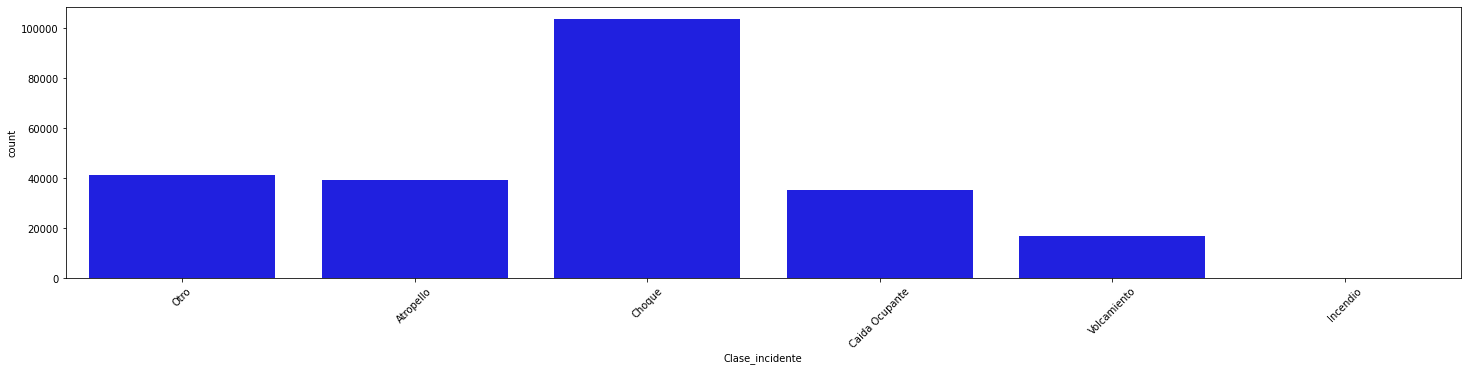

In [149]:
# Graficamente podemos verlo de la siguiente manera
fig = plt.figure(figsize=(25,5))
sns.countplot(data=dfinal, x='Clase_incidente', color='BLUE')
plt.xticks(rotation=45)

Analicemos la frecuencia de incidentes viales por dia, mes y por año.

In [150]:
# Como referencia saco los templates de plotly.io que puedo usar considerando que llamamos a la libreria como pio
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [151]:
#FRECUENCIA POR DIA
agr_df_dia = dfinal.groupby(['Dia'])['Clase_incidente'].count(). reset_index()
agr_df_dia = agr_df_dia.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_dia

,Dia,Cantidad_Incidentes
0,Dom,28570
1,Jue,34568
2,Lun,34078
3,Mar,34750
4,MiÃ©,34914
5,SÃ¡b,34107
6,Vie,34856


In [152]:
fig = px.bar(agr_df_dia, x='Dia', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Dia':'Dia de la Semana'},
             title='Cantidad de Accidentes registrado por Dia de la Semana',
             height=400)
fig.show()

In [153]:
# Analisis Detallado
# genera una tabla de doble entrada 
df_mask1 = pd.crosstab(index = dfinal['Clase_incidente'],
            columns=dfinal['Dia'], margins=True)
df_mask1

Dia,Dom,Jue,Lun,Mar,MiÃ©,SÃ¡b,Vie,All
Clase_incidente,,,,,,,,
Atropello,5109,5625,5259,5622,5686,6311,5843,39455
Caida Ocupante,4287,5274,5429,5228,5008,4726,5146,35098
Choque,12308,14845,14820,15186,15523,15265,15436,103383
Incendio,3,5,8,2,2,1,3,24
Otro,4913,6347,6093,6195,6171,5414,6029,41162
Volcamiento,1950,2472,2469,2517,2524,2390,2399,16721
All,28570,34568,34078,34750,34914,34107,34856,235843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

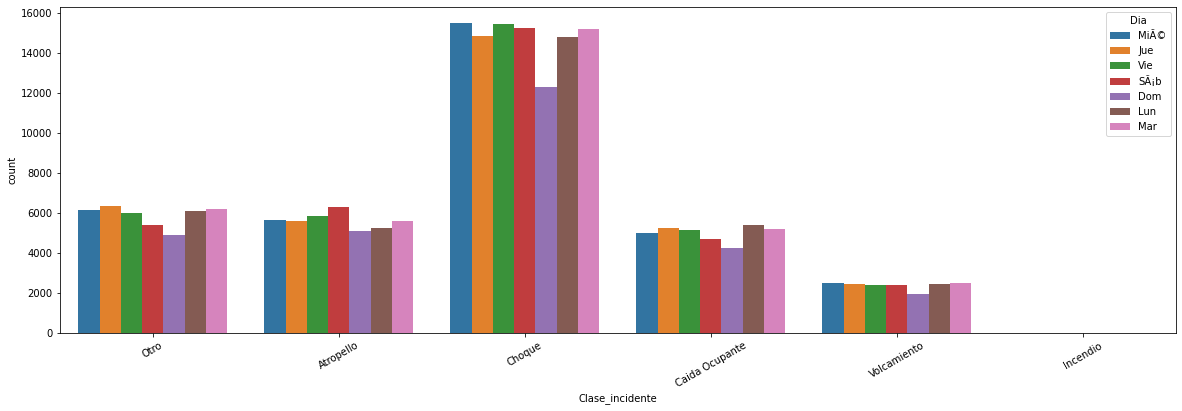

In [154]:
fig = plt.figure(figsize=(20,6))
sns.countplot(dfinal.Clase_incidente,  hue=dfinal.Dia)
plt.xticks(rotation=30)

FRECUENCIA POR MES

In [155]:
# Analisis General
agr_df_mes = dfinal.groupby(['Mes'])['Clase_incidente'].count(). reset_index()#.sort_values(by='Clase_incidente', ascending=False)
agr_df_mes = agr_df_mes.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_mes

,Mes,Cantidad_Incidentes
0,Abr,17713
1,Ago,21893
2,Dic,18115
3,Ene,18981
4,Feb,20513
5,Jul,20951
6,Jun,19612
7,Mar,20560
8,May,19649
9,Nov,17519


In [156]:
fig = px.bar(agr_df_mes, x='Mes', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Mes':'Mes del Año'},
             title='Cantidad de Accidentes registrado por Mes del Año',
             height=400)
fig.show()

FRECUENCIA POR AÑO

In [157]:
# Analisis General
agr_df_año = dfinal.groupby(['Anio'])['Clase_incidente'].count(). reset_index()
agr_df_año = agr_df_año.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_año

,Anio,Cantidad_Incidentes
0,2014,31411
1,2015,32622
2,2016,33791
3,2017,31658
4,2018,29082
5,2019,31876
6,2020,23676
7,2021,21727


In [158]:
fig = px.bar(agr_df_año, x='Anio', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'AÃ±o':'Año'},
             title='Cantidad de Accidentes registrado por Año',
             height=400)
fig.show()

Aquí tenemos en cuanta que el dataset tiene datos hasta el 30 de septiembre de 2021. Por eso vale aclarar que el año 2021 tiene faltante de datos para la comparación de años.

Se analizan los incidentes por Comuna

In [159]:
# Como las comunas son 22 podemos hacer un analisis general de toda la poblacion
agr_df_comuna = pd.crosstab(index = dfinal['Comuna'],
                columns=dfinal['Clase_incidente'], margins=True)
agr_df_comuna

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,All
Comuna,,,,,,,
01 - Popular,1520,747,1045,1,770,365,4448
02 - Santa Cruz,1191,544,1157,0,585,273,3750
03 - Manrique,2390,1419,3342,1,1545,724,9421
04 - Aranjuez,2852,2052,6398,2,2326,904,14534
05 - Castilla,2850,3551,10761,0,4173,1548,22883
06 - Doce de Octubre,1921,1787,2504,0,1499,478,8189
07 - Robledo,2158,3291,6696,0,3445,1103,16693
08 - Villa Hermosa,1647,1248,2892,1,1295,630,7713
09 - Buenos Aires,1514,1351,3921,0,1837,809,9432


Como la Población general de Barrios son aproximadamente 450, el análisis no puede considerar la toralidad de Barrios por lo tanto optamos por tomar un valor determinado de los mismos considerando de aquellos que tuvieron mayor cantidad de Incidentes. Se eliminaron datos considerados nulos que podían afectar el análisis.

In [160]:
# Defino cuantos barrios voy a considerar de acuerdo a los que tienen mayor frecuencia de Incidentes
top = 20
# Armo un data frame con los Barrios ordena de mayor a menor por la cantidad de Incidentes 
select_barrios_df = dfinal.Barrio.value_counts().reset_index()\
    .rename(columns={'index': 'Barrios', 'Barrio': 'Frecuencia'})
# Dejo en ese data frame solo los barrios que defino con la variable top
select_barrios_df = select_barrios_df[:top]
select_barrios_df

,Barrios,Frecuencia
0,Sin Inf,21264
1,Caribe,3917
2,La Candelaria,3799
3,Perpetuo Socorro,3759
4,Campo Amor,3608
5,Cabecera San Antonio de Prado,3318
6,Santa FÃ©,3289
7,Castilla,3185
8,Barrio ColÃ³n,2830
9,Los Conquistadores,2800


In [161]:
dfinal.dtypes

Gravedad_victima               object
Fecha_incidente        datetime64[ns]
Hora_incidente                 object
Clase_incidente                object
Direccion_incidente            object
Sexo                           object
Edad                            int64
Condicion                      object
Mes                            object
Dia                            object
Num_dia                       float64
Hora                           object
Grupo_edad                     object
Anio                            int64
Radicado                      float64
Latitud                       float64
Longitud                      float64
Comuna                         object
Barrio                         object
dtype: object

In [162]:
# del dfinal2

dfinal2 = dfinal

In [117]:
# and latitud != None and longitud != None

dfinal

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Anio,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,2014-01-01,00:15:00,Otro,CR 49 CL 72,M,17.0,Motociclista,Ene,MiÃ©,1.0,0,10 - 19,2014.0,1423940.0,-75.559099,6.266915,04 - Aranjuez,Manrique Central No. 1
1,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,M,20.0,Motociclista,Ene,MiÃ©,1.0,0,20 - 29,2014.0,1423921.0,-75.553292,6.289353,01 - Popular,MoscÃº No. 2
2,Heridos,2014-01-01,00:30:00,Atropello,CR 46 CL 98,F,18.0,Peaton,Ene,MiÃ©,1.0,0,10 - 19,2014.0,1423921.0,-75.553292,6.289353,01 - Popular,MoscÃº No. 2
3,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,19.0,Motociclista,Ene,MiÃ©,1.0,0,10 - 19,2014.0,1423849.0,-75.607611,6.234327,16 - BelÃ©n,Las Mercedes
4,Heridos,2014-01-01,00:37:00,Atropello,CL 32 CR 84,M,39.0,Peaton,Ene,MiÃ©,1.0,0,30 - 39,2014.0,1423849.0,-75.607611,6.234327,16 - BelÃ©n,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235839,Heridos,2021-09-30,22:00:00,Otro,CL 54 CR 9 A,F,29.0,Acompaniante de Motocicleta,Sept,Jue,30.0,22,20 - 29,2021.0,1764135.0,-75.536311,6.234267,08 - Villa Hermosa,Las Estancias
235840,Heridos,2021-09-30,22:00:00,Caida Ocupante,CL 81 CR 39,M,41.0,Acompaniante de Motocicleta,Sept,Jue,30.0,22,40 - 49,2021.0,1763968.0,-75.548675,6.272697,03 - Manrique,Santa InÃ©s
235841,Heridos,2021-09-30,23:00:00,Atropello,CR 63 CL 32,F,51.0,Peaton,Sept,Jue,30.0,23,50 - 59,2021.0,1764133.0,NaN,NaN,Sin Inf,NaN
235842,Heridos,2021-09-30,23:00:00,Otro,CR 107 CL 65,M,23.0,Motociclista,Sept,Jue,30.0,23,20 - 29,2021.0,1763946.0,NaN,NaN,Sin Inf,NaN


In [180]:
# CAMBIAR LA LATITUD POR LONGITUD (MEDELLIN: Latitud: 6.217 Longitud: -75.567) 
# latitud = 
# dfinal2.loc[dfinal2['Latitud'][i] < dfinal2['Longitud'][i] ] = latitud

# funcion que devuelve true o false si es nan
def isNaN(num):
    return num != num

# ITERO EL DF
for i in dfinal2.index:
  # print(type(dfinal2['Latitud'][i]))
  #VALIDO QUE LATITUD NO SEA NAN y SEA MENOR A 0 (-75)
  if(isNaN(dfinal2['Latitud'][i]) == False and dfinal2['Latitud'][i] < 0):
      # print(type(latitud))

      # Cargo los valores en variables antes de cambiarlos
      latitud = int(dfinal2['Latitud'][i])
      longitud = int(dfinal2['Longitud'][i])

      # HAGO PRINT
      print("LATITUD:  "+ str(latitud) + " LONGITUD: "+ str(longitud) + " cdr: " + str(i))

      # dfinal2['Latitud'][i].replace(latitud, longitud)
      # dfinal2.Latitud[i].replace(latitud, longitud)

      # EVALUO QUE LA LONGITUD SEA > 0 (6)
      if(longitud > 0 ):
        dfinal2.loc[i,'Latitud'] = longitud
        dfinal2.loc[i,'Longitud'] = latitud
      i+=1
      # if(i > 1):
      #   break

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64

In [183]:
# CONTROLO QUE NO ME QUEDEN LATITUDES MENORES A 0
dfinal2[dfinal2['Latitud'] < 0]

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Anio,Radicado,Latitud,Longitud,Comuna,Barrio


In [ ]:
# Terminar de editar los formatos a int edad, fechas.
# HACER MAPA DE CALOR PARA VER LA RELACION ENTE LA VARIABLES, CAMBIAR LOS NOMBRES DE LOS DATASET Y VER LOS VALORES
# Que % de nan hay en cada columna y en general

# Correlation_matrix=bos.corr().round(2)
# sns.heatmap(data=correlation_matrix, annot=True)

El coeficiente de correlación oscila entre -1 y 1. Si el valor se acerca a 1, significa que existe una fuerte correlación positiva entre las dos variables. Cuando se acerca a -1, las variables tienen una fuerte correlación negativa.

In [50]:
# Analisamos si tenemos registros nulos o NAN y vemos que aparecen este tipo
# de datos sobre todo en las columnas que corregimos y convertimos a numericas
dfinal.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                       0
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       0
Grupo_edad                 0
Anio                       0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                     0
Barrio                   618
dtype: int64

Guardo el dataFrame dfinal en un csv para seguir los análisis de los ciclos posteriores

In [ ]:
dfinal.to_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/dfinal.csv', index=False)

In [ ]:
# LEER EL SET DE DATOS
df1 = pd.read_csv('/content/drive/MyDrive/IA_TP/TP_ACCIDENTES_VIALES_MEDELLIN/dfinal.csv')
df1

FileNotFoundError: ignored